In [784]:
import os
import pandas as pd

In [785]:
lvi = pd.read_json(os.path.join('data','ceske_lvy.json'))

In [786]:
lvi.loc[lvi['Film'] == 'Záhrada', 'Film'] = 'Zahrada (8967)'

In [787]:
lvi

,Ročník,Vyhlášení,Kategorie,Jméno,Lev,Jméno bez id,Datum narození,Datum úmrtí,Film,KategorieS
0,1993,1994-02-25,Nejlepší film,Jiří Ježek (4473),vyhra,Jiří Ježek,1950-06-01T00:00:00.000,None,Šakalí léta (7307),Nejlepší film
1,1993,1994-02-25,Nejlepší režie,Jan Hřebejk (4831),vyhra,Jan Hřebejk,1967-06-27T00:00:00.000,None,Šakalí léta (7307),Nejlepší režie
2,1993,1994-02-25,Hlavní mužský herecký výkon,Josef Abrhám (2274),vyhra,Josef Abrhám,1939-12-14T00:00:00.000,2022-05-16T00:00:00.000,Šakalí léta (7307),Nejlepší herec v hlavní roli
3,1993,1994-02-25,Nejlepší hudba,Ivan Hlas (8715),vyhra,Ivan Hlas,1954-05-10T00:00:00.000,None,Šakalí léta (7307),Nejlepší hudba
4,1997,1998-02-28,Nejlepší film,Jiří Ježek (4473),nominace,Jiří Ježek,1950-06-01T00:00:00.000,None,Báječná léta pod psa (9462),Nejlepší film
...,...,...,...,...,...,...,...,...,...,...
2528,2023,2024-03-09,Nejlepší krátký film,Kryštof Burda,nominace,Kryštof Burda,None,None,Osmý den,Nejlepší krátký film
2529,2023,2024-03-09,Nejlepší krátký film,Tomáš Pertold,nominace,Tomáš Pertold,None,None,Osmý den,Nejlepší krátký film
2530,2023,2024-03-09,Nejlepší krátký film,Petr Pylypčuk,nominace,Petr Pylypčuk,None,None,Osmý den,Nejlepší krátký film
2531,2023,2024-03-09,Cena Magnesia za nejlepší studentský film,Petr Pylypčuk,nominace,Petr Pylypčuk,None,None,Osmý den,Cena Magnesia za nejlepší studentský film


In [788]:
lvovstvonestatutarni = lvi[lvi['Lev'] == 'vyhra']['Jméno'].drop_duplicates().to_list()

In [789]:
lvi['KategorieS'].drop_duplicates().to_list()

['Nejlepší film',
 'Nejlepší režie',
 'Nejlepší herec v hlavní roli',
 'Nejlepší hudba',
 'Nejlepší střih',
 'Hlavní ženský herecký výkon',
 'Nejlepší herec ve vedlejší roli',
 'Nejlepší scénář',
 'Cena filmových kritiků',
 'Nejlepší herečka ve vedlejší roli',
 'Nejlepší filmový plakát',
 'Nejlepší zvuk',
 'Nejlepší výtvarný počin',
 'Nejlepší kamera',
 'Cena filmových kritiků a teoretiků za nejlepší hraný film',
 'Nejlepší kostýmy',
 'Nejlepší scénografie',
 'Nejlepší masky',
 'Nejlepší televizní film nebo minisérie',
 'Nejlepší televizní seriál',
 'Dlouhodobý přínos českému filmu',
 'Mimořádný počin v oblasti audiovize',
 'Nejlepší dokument',
 'Cena filmových fanoušků',
 'Nejlepší animovaný film',
 'Cena ČFTA za audiovizuální počin roku',
 'Cena filmových kritiků a teoretiků za nejlepší dokument',
 'Cena Magnesia za nejlepší studentský film',
 'Nejlepší krátký film']

In [790]:
nejsoulvi = ['Cena filmových kritiků','Cena filmových kritiků a teoretiků za nejlepší hraný film','Cena filmových fanoušků','Nejlepší filmový plakát','Cena Magnesia za nejlepší studentský film']

In [791]:
lvi = lvi[~lvi['KategorieS'].isin(nejsoulvi)]

In [792]:
lvi['Vyhlášení'] = pd.to_datetime(lvi['Vyhlášení'])
lvi['Datum narození'] = pd.to_datetime(lvi['Datum narození'], format='mixed')

C:\Users\micha\AppData\Local\Temp\ipykernel_20752\2422081209.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lvi['Vyhlášení'] = pd.to_datetime(lvi['Vyhlášení'])
C:\Users\micha\AppData\Local\Temp\ipykernel_20752\2422081209.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lvi['Datum narození'] = pd.to_datetime(lvi['Datum narození'], format='mixed')


## Basic statistiky a rekordy

In [793]:
lvi.groupby('Ročník')['Kategorie'].nunique()

Ročník
1993    10
1994    13
1995    14
1996    13
1997    13
1998    13
1999    13
2000    13
2001    14
2002    14
2003    13
2004    13
2005    13
2006    13
2007    13
2008    14
2009    15
2010    15
2011    15
2012    15
2013    16
2014    16
2015    16
2016    16
2017    16
2018    17
2019    17
2020    20
2021    20
2022    21
2023    19
Name: Kategorie, dtype: int64

In [885]:
lvi.groupby('Film')['Kategorie'].nunique().nlargest(15)

Film
Bratři                          14
Fair Play (400561)              14
Havel (402069)                  14
Hořící keř (398412)             14
Krajina ve stínu (402170)       14
Ztraceni v Mnichově (400606)    14
Bába z ledu (401257)            13
Díra u Hanušovic (400560)       13
Masaryk (401331)                13
Okupace (402157)                13
Po strništi bos (401274)        13
Toman (401772)                  13
Zátopek                         13
Šarlatán (402092)               13
Anthropoid (400929)             12
Name: Kategorie, dtype: int64

In [884]:
lvi[lvi["Lev"] == 'vyhra'].groupby('Film')['Kategorie'].nunique().nlargest(15)

Film
Masaryk (401331)                  12
Hořící keř (398412)               11
Je třeba zabít Sekala (163291)    10
Nabarvené ptáče (401962)           9
Ve stínu (66076)                   9
Zátopek                            8
Cesta ven (400548)                 7
Štěstí (17155)                     7
                                   6
Bába z ledu (401257)               6
Il Boemo                           6
Kobry a Užovky (400584)            6
Kolja (9013)                       6
Krajina ve stínu (402170)          6
Protektor (52494)                  6
Name: Kategorie, dtype: int64

In [794]:
lvi.groupby('Jméno').size().nlargest(10)

Jméno
Martin Štrba (829)          21
Pavel Rejholec (5364)       18
Alois Fišárek (570)         17
Jan Svěrák (476)            17
Karel Roden                 16
Radim Hladík jr. (92572)    16
Jan Hřebejk (4831)          14
Milan Býček (4811)          14
Pavel Strnad (2506)         14
Petr Zelenka (4806)         14
dtype: int64

In [795]:
lvi[lvi["Lev"] == 'vyhra'].groupby('Jméno').size().nlargest(15)

Jméno
Jiří Brožek (154)          9
Pavel Rejholec (5364)      8
Vladimír Smutný (1772)     8
Ivan Trojan (6789)         7
Jakub Čech (6357)          7
Alois Fišárek (570)        6
Anna Geislerová (5433)     5
Bohdan Sláma (926)         5
David Ondříček (2028)      5
Jan Svěrák (476)           5
Jan Vlasák (1805)          5
Jan Švankmajer (406)       5
Klára Melíšková (13764)    5
Martin Štrba (829)         5
Petr Zelenka (4806)        5
dtype: int64

In [880]:
lvi[(lvi['Lev'] == 'vyhra') & (lvi['Jméno'] == "Jiří Brožek (154)")].sort_values(by="Ročník")

,Ročník,Vyhlášení,Kategorie,Jméno,Lev,Jméno bez id,Datum narození,Datum úmrtí,Film,KategorieS,Věk
155,1993,1994-02-25,Nejlepší střih,Jiří Brožek (154),vyhra,Jiří Brožek,1947-03-11,None,Krvavý román (398471),Nejlepší střih,17153 days
184,1998,1999-02-28,Nejlepší střih,Jiří Brožek (154),vyhra,Jiří Brožek,1947-03-11,None,Je třeba zabít Sekala (163291),Nejlepší střih,18982 days
202,2000,2001-03-03,Nejlepší střih,Jiří Brožek (154),vyhra,Jiří Brožek,1947-03-11,None,Anděl Exit (260),Nejlepší střih,19716 days
224,2003,2004-03-03,Nejlepší střih,Jiří Brožek (154),vyhra,Jiří Brožek,1947-03-11,None,Nuda v Brně (20268),Nejlepší střih,20812 days
234,2005,2006-02-25,Nejlepší střih,Jiří Brožek (154),vyhra,Jiří Brožek,1947-03-11,None,Sluneční stát (36261),Nejlepší střih,21536 days
238,2006,2007-03-03,Nejlepší střih,Jiří Brožek (154),vyhra,Jiří Brožek,1947-03-11,None,Hezké chvilky bez záruky (38735),Nejlepší střih,21907 days
252,2007,2008-03-01,Nejlepší střih,Jiří Brožek (154),vyhra,Jiří Brožek,1947-03-11,None,...a bude hůř (45816),Nejlepší střih,22271 days
136,2011,2012-03-03,Nejlepší střih,Jiří Brožek (154),vyhra,Jiří Brožek,1947-03-11,None,Odcházení (56870),Nejlepší střih,23734 days
262,2017,2018-03-10,Nejlepší střih,Jiří Brožek (154),vyhra,Jiří Brožek,1947-03-11,None,Špína (401181),Nejlepší střih,25932 days


In [796]:
lvi[lvi["Lev"] == 'vyhra'].groupby('Jméno')['Ročník'].nunique().nlargest(15)

Jméno
Jiří Brožek (154)           9
Pavel Rejholec (5364)       8
Vladimír Smutný (1772)      8
Jakub Čech (6357)           7
Alois Fišárek (570)         6
Ivan Trojan (6789)          6
Anna Geislerová (5433)      5
Jan Vlasák (1805)           5
Klára Melíšková (13764)     5
Martin Štrba (829)          5
Radim Hladík jr. (92572)    5
Ivo Špalj (694)             4
Jan P. Muchow (2302)        4
Jan Švankmajer (406)        4
Jiří Schmitzer (2936)       4
Name: Ročník, dtype: int64

In [797]:
lvovstvo = lvi[lvi["Lev"] == 'vyhra']['Jméno'].drop_duplicates().to_list()

In [798]:
lvi[~lvi['Jméno'].isin(lvovstvo)].groupby('Jméno').size().nlargest(10)

Jméno
Jana Bílková (17734)         9
Petr Ostrouchov (5833)       8
Jakub Hejna (2291)           7
Jan Čeněk (931)              6
Radim Procházka (7830)       6
Slávek Horák (80123)         6
Andrea Sedláčková (4786)     5
Ivan Fíla (11360)            5
Petr Turyna (13496)          5
Zuzana Mistríková (62009)    5
dtype: int64

In [799]:
nominantstvo = lvi[lvi["Lev"] == 'nominace']['Jméno'].drop_duplicates().to_list()

In [800]:
lvi[~lvi['Jméno'].isin(nominantstvo)].groupby('Jméno').size().nlargest(10)

Jméno
Jan Budař (11090)            4
Jan Balej (211)              3
Julius Ševčík (149)          3
Martin Velíšek (1289)        3
Adéla Komrzý                 2
Agnieszka Holland (12106)    2
David Vondráček (616)        2
Jiří Kodet (7135)            2
Luboš Fišer (1492)           2
Lukáš Přibyl (35920)         2
dtype: int64

In [801]:
lvi['Věk'] = lvi['Vyhlášení'] - lvi['Datum narození']

C:\Users\micha\AppData\Local\Temp\ipykernel_20752\1279823061.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  lvi['Věk'] = lvi['Vyhlášení'] - lvi['Datum narození']


In [802]:
lvi.sort_values(by="Věk").head(10)

,Ročník,Vyhlášení,Kategorie,Jméno,Lev,Jméno bez id,Datum narození,Datum úmrtí,Film,KategorieS,Věk
374,1996,1997-03-01,Vedlejší mužský herecký výkon,Andrej Chalimon (37311),vyhra,Andrej Chalimon,1990-01-01,None,Kolja (9013),Nejlepší herec ve vedlejší roli,2616 days
1457,2019,2020-03-07,Nejlepší mužský herecký výkon v hlavní roli,Petr Kotlár (120298),nominace,Petr Kotlár,2007-01-01,None,Nabarvené ptáče (401962),Nejlepší herec v hlavní roli,4814 days
1060,1995,1996-03-02,Hlavní ženský herecký výkon,Klára Issová (1058),nominace,Klára Issová,1979-04-26,None,Indiánské léto (8296),Hlavní ženský herecký výkon,6155 days
1150,1995,1996-03-02,Hlavní ženský herecký výkon,Zuzana Šulajová (8446),nominace,Zuzana Šulajová,1978-07-14,None,Zahrada (8967),Hlavní ženský herecký výkon,6441 days
81,2011,2012-03-03,Vedlejší ženský herecký výkon,Anna Linhartová (79451),nominace,Anna Linhartová,1994-03-21,None,Nevinnost (163675),Nejlepší herečka ve vedlejší roli,6557 days
646,1994,1995-03-03,Vedlejší ženský herecký výkon,Andrea Elsnerová (26762),nominace,Andrea Elsnerová,1977-02-05,None,Řád (7787),Nejlepší herečka ve vedlejší roli,6600 days
947,1997,1998-02-28,Vedlejší ženský herecký výkon,Klára Issová (1058),vyhra,Klára Issová,1979-04-26,None,Nejasná zpráva o konci světa (9463),Nejlepší herečka ve vedlejší roli,6883 days
330,1994,1995-03-03,Hlavní ženský herecký výkon,Anna Geislerová (5433),nominace,Anna Geislerová,1976-04-17,None,Jízda (7790),Hlavní ženský herecký výkon,6894 days
1494,1998,1999-02-28,Vedlejší mužský herecký výkon,Václav Jakoubek (34089),nominace,Václav Jakoubek,1980-02-29,None,Co chytneš v žitě (181956),Nejlepší herec ve vedlejší roli,6939 days
388,2001,2002-03-02,Vedlejší mužský herecký výkon,Kryštof Hádek (1830),nominace,Kryštof Hádek,1982-03-10,None,Tmavomodrý svět (355),Nejlepší herec ve vedlejší roli,7297 days


In [803]:
lvi.sort_values(by="Věk").dropna().tail(20)

,Ročník,Vyhlášení,Kategorie,Jméno,Lev,Jméno bez id,Datum narození,Datum úmrtí,Film,KategorieS,Věk
1305,1999,2000-03-04,Nejlepší režie,Karel Kachyňa (3526),nominace,Karel Kachyňa,1924-05-01,2004-03-12T00:00:00.000,Hanele (22572),Nejlepší režie,27701 days
1373,2010,2011-03-05,Nejlepší scénář,Juraj Herz (7875),nominace,Juraj Herz,1934-09-04,2018-04-08T00:00:00.000,Habermannův mlýn (103372),Nejlepší scénář,27941 days
1576,1998,1999-02-28,Vedlejší ženský herecký výkon,Sylva Langová (25592),nominace,Sylva Langová,1921-08-31,2010-01-15T00:00:00.000,Postel (38577),Nejlepší herečka ve vedlejší roli,28305 days
298,2011,2012-03-03,Mimořádný přínos české kinematografii,Josef Somr (1054),vyhra,Josef Somr,1934-04-15,2022-10-16T00:00:00.000,,Dlouhodobý přínos českému filmu,28447 days
533,2003,2004-03-03,Vedlejší ženský herecký výkon,Jaroslava Adamová (11226),nominace,Jaroslava Adamová,1925-03-15,2012-06-16T00:00:00.000,Želary (13452),Nejlepší herečka ve vedlejší roli,28843 days
214,2001,2002-03-02,Hlavní ženský herecký výkon,Stella Zázvorková (834),vyhra,Stella Zázvorková,1922-04-14,2005-05-17T00:00:00.000,Babí léto (1418),Hlavní ženský herecký výkon,29177 days
289,1998,1999-02-28,Dlouholetý umělecký přínos českému filmu,Jiří Krejčík (7882),vyhra,Jiří Krejčík,1918-06-26,2013-08-08T00:00:00.000,,Dlouhodobý přínos českému filmu,29467 days
706,2019,2020-03-07,Nejlepší mužský herecký výkon ve vedlejší roli,Ladislav Mrkvička (6298),vyhra,Ladislav Mrkvička,1939-02-02,2020-12-27T00:00:00.000,Staříci (401990),Nejlepší herec ve vedlejší roli,29619 days
219,2001,2002-03-02,Hlavní mužský herecký výkon,Vlastimil Brodský (833),vyhra,Vlastimil Brodský,1920-12-15,2002-04-20T00:00:00.000,Babí léto (1418),Nejlepší herec v hlavní roli,29662 days
134,2012,2013-03-02,Vedlejší ženský herecký výkon,Jiřina Jirásková (22836),nominace,Jiřina Jirásková,1931-02-17,2013-01-07T00:00:00.000,Vrásky z lásky (160354),Nejlepší herečka ve vedlejší roli,29964 days


In [804]:
lvi[lvi['Datum úmrtí'] < lvi['Vyhlášení']].sort_values(by="Vyhlášení")

,Ročník,Vyhlášení,Kategorie,Jméno,Lev,Jméno bez id,Datum narození,Datum úmrtí,Film,KategorieS,Věk
339,1994,1995-03-03,Hlavní mužský herecký výkon,Petr Čepek (4764),vyhra,Petr Čepek,1940-09-16,1994-09-20T00:00:00.000,Lekce Faust (7783),Nejlepší herec v hlavní roli,19891 days
635,1994,1995-03-03,Vedlejší mužský herecký výkon,Josef Kemr (4897),nominace,Josef Kemr,1922-06-20,1995-01-15T00:00:00.000,Pevnost (185691),Nejlepší herec ve vedlejší roli,26554 days
712,2005,2006-02-25,Nejlepší výtvarný počin,Eva Švankmajerová (7289),vyhra,Eva Švankmajerová,1940-09-25,2005-10-20T00:00:00.000,Šílení (35194),Nejlepší výtvarný počin,23894 days
2071,2008,2009-03-07,Nejlepší dokument,Pavel Koutecký (566),vyhra,Pavel Koutecký,1956-06-10,2006-04-13T00:00:00.000,Občan Havel (45195),Nejlepší dokument,19263 days
1538,2010,2011-03-05,Vedlejší mužský herecký výkon,Vladimír Dlouhý (5496),vyhra,Vladimír Dlouhý,1958-06-10,2010-06-20T00:00:00.000,Kajínek (55120),Nejlepší herec ve vedlejší roli,19261 days
134,2012,2013-03-02,Vedlejší ženský herecký výkon,Jiřina Jirásková (22836),nominace,Jiřina Jirásková,1931-02-17,2013-01-07T00:00:00.000,Vrásky z lásky (160354),Nejlepší herečka ve vedlejší roli,29964 days
1010,2016,2017-03-04,Nejlepší scénář,Alex Koenigsmark (76145),vyhra,Alex Koenigsmark,1944-05-27,2013-01-23T00:00:00.000,Masaryk (401331),Nejlepší scénář,26579 days
1638,2019,2020-03-07,Nejlepší filmová scénografie,Martin Kurel (6828),nominace,Martin Kurel,1961-01-27,2019-07-04T00:00:00.000,Hodinářův učeň (401938),Nejlepší scénografie,21589 days
1643,2019,2020-03-07,Nejlepší filmová scénografie,Martin Kurel (6828),nominace,Martin Kurel,1961-01-27,2019-07-04T00:00:00.000,Poslední aristokratka (402001),Nejlepší scénografie,21589 days
1645,2020,2021-03-06,Nejlepší scénografie,Martin Kurel (6828),vyhra,Martin Kurel,1961-01-27,2019-07-04T00:00:00.000,Marie Terezie II,Nejlepší scénografie,21953 days


In [805]:
lvi.groupby(["Ročník","Jméno"])['Film'].nunique().nlargest()

Ročník  Jméno                              
2021    Pavel Rejholec (5364)                  3
2022    Michal Reitler (8046)                  3
        Pavla Janoušková Kubečková (107301)    3
1994    Alois Fišárek (570)                    2
        F. A. Brabec (5610)                    2
Name: Film, dtype: int64

In [806]:
lvi[lvi['Jméno'] == 'Pavla Janoušková Kubečková']

,Ročník,Vyhlášení,Kategorie,Jméno,Lev,Jméno bez id,Datum narození,Datum úmrtí,Film,KategorieS,Věk


In [807]:
lvi[lvi['Jméno'] == 'Michal Reitler (8046)']

,Ročník,Vyhlášení,Kategorie,Jméno,Lev,Jméno bez id,Datum narození,Datum úmrtí,Film,KategorieS,Věk
1561,2021,2022-03-05,Nejlepší televizní film nebo minisérie,Michal Reitler (8046),vyhra,Michal Reitler,NaT,None,Božena,Nejlepší televizní film nebo minisérie,NaT
1789,2022,2023-03-04,Nejlepší televizní film nebo minisérie,Michal Reitler (8046),nominace,Michal Reitler,NaT,None,Král Šumavy: Fantom temného kraje,Nejlepší televizní film nebo minisérie,NaT
1971,2022,2023-03-04,Nejlepší televizní film nebo minisérie,Michal Reitler (8046),vyhra,Michal Reitler,NaT,None,Podezření (396954),Nejlepší televizní film nebo minisérie,NaT
2184,2022,2023-03-04,Nejlepší televizní seriál,Michal Reitler (8046),vyhra,Michal Reitler,NaT,None,Devadesátky,Nejlepší televizní seriál,NaT
2207,2023,2024-03-09,Nejlepší televizní seriál,Michal Reitler (8046),nominace,Michal Reitler,NaT,None,"Dobré ráno, Brno!",Nejlepší televizní seriál,NaT
2502,2021,2022-03-05,Nejlepší televizní seriál,Michal Reitler (8046),vyhra,Michal Reitler,NaT,None,Ochránce,Nejlepší televizní seriál,NaT


In [808]:
lvi[lvi['Jméno'] == 'Andrea Sedláčková (4786)']

,Ročník,Vyhlášení,Kategorie,Jméno,Lev,Jméno bez id,Datum narození,Datum úmrtí,Film,KategorieS,Věk
591,2014,2015-02-21,Nejlepší režie,Andrea Sedláčková (4786),nominace,Andrea Sedláčková,1967-02-22,None,Fair Play (400561),Nejlepší režie,17531 days
592,2014,2015-02-21,Nejlepší scénář,Andrea Sedláčková (4786),nominace,Andrea Sedláčková,1967-02-22,None,Fair Play (400561),Nejlepší scénář,17531 days
2332,2014,2015-02-21,Nejlepší dokument,Andrea Sedláčková (4786),nominace,Andrea Sedláčková,1967-02-22,None,Život podle Václava Havla (400664),Nejlepší dokument,17531 days
2333,2020,2021-03-06,Nejlepší dokumentární film,Andrea Sedláčková (4786),nominace,Andrea Sedláčková,1967-02-22,None,Můj otec Antonín Kratochvíl (402148),Nejlepší dokument,19736 days
2335,2022,2023-03-04,Nejlepší dokumentární film,Andrea Sedláčková (4786),nominace,Andrea Sedláčková,1967-02-22,None,"Toyen, baronka surrealismu",Nejlepší dokument,20464 days


In [809]:
lvi.groupby(['Jméno','Ročník']).size().nlargest()

Jméno                     Ročník
Jan Švankmajer (406)      1994      4
Sean Ellis (130080)       2016      4
Václav Marhoul (3781)     2019      4
Andrea Sedláčková (4786)  2014      3
David Ondříček (2028)     2012      3
dtype: int64

In [810]:
lvi[lvi['KategorieS'].str.contains('here',na=False)].groupby(['Jméno','Ročník']).size().nlargest(20)

Jméno                     Ročník
Boleslav Polívka (1556)   2000      2
David Novotný (1834)      2008      2
Eliška Balzerová (14418)  2010      2
Eliška Křenková (26750)   2021      2
Ivan Trojan (6789)        2002      2
Karel Roden               2011      2
                          2016      2
Martin Huba (7134)        2009      2
Martin Pechlát (9426)     2021      2
Oldřich Kaiser (1794)     2011      2
Ondřej Vetchý (836)       2012      2
Adam Mišík (27584)        2022      1
Agnieszka Sitek (75805)   1998      1
Alena Mihulová (7032)     2015      1
                          2021      1
Alois Švehlík (6277)      2019      1
Andrea Elsnerová (26762)  1994      1
Andrej Chalimon (37311)   1996      1
Andrej Hryc (6636)        1998      1
Anna Friel (40427)        2008      1
dtype: int64

In [886]:
lvi[lvi['KategorieS'].str.contains('here',na=False) & (lvi['Lev'] == 'vyhra')].groupby(['Jméno','Ročník']).size().nlargest(20)

Jméno                       Ročník
Ivan Trojan (6789)          2002      2
Agnieszka Sitek (75805)     1998      1
Alena Mihulová (7032)       2015      1
Andrej Chalimon (37311)     1996      1
Anna Geislerová (5433)      1999      1
                            2003      1
                            2005      1
                            2006      1
                            2011      1
Anna Šišková (6600)         2000      1
Antonie Formanová (131569)  2021      1
Boleslav Polívka (1556)     1996      1
                            2000      1
Daniela Kolářová (1847)     2009      1
Eliška Balzerová (14418)    2010      1
Eliška Křenková (26750)     2018      1
Emília Vášáryová (4986)     2004      1
Eva Holubová (5948)         2000      1
Gabriela Míčová (9758)      2012      1
Hynek Čermák (3370)         2011      1
dtype: int64

## Spojení s filmy

In [811]:
filmy = pd.read_json(os.path.join('data','filmy.json'))

In [812]:
hraji = filmy[['Film','Hrají']]

In [813]:
hraji = hraji.explode("Hrají")

In [814]:
hraji[hraji['Hrají'].isin(lvovstvo)].groupby('Film').size().nlargest(10)

Film
Velká filmová loupež (397520)    12
Čert ví proč (15823)             12
Anděl Páně 2 (401251)            11
Mazaný Filip (20319)             11
Odcházení (56870)                11
Hořící keř (398412)               9
Obecná škola (397700)             9
Rok ďábla (12836)                 9
Vrásky z lásky (160354)           9
Andělé všedního dne (400528)      8
dtype: int64

In [815]:
hraji[hraji['Hrají'].isin(lvovstvonestatutarni)].groupby('Film').size().nlargest(10)

Film
Mazaný Filip (20319)             15
Velká filmová loupež (397520)    12
Čert ví proč (15823)             12
Anděl Páně 2 (401251)            11
Odcházení (56870)                11
Gympl (45351)                    10
Hořící keř (398412)               9
Obecná škola (397700)             9
Rok ďábla (12836)                 9
Ve stínu (66076)                  9
dtype: int64

In [816]:
lvi[(lvi['Lev'] == 'vyhra') & (lvi['Jméno'].isin(hraji[hraji['Hrají'].isin(lvovstvo) & (hraji['Film'] == 'Mazaný Filip (20319)')]['Hrají'].to_list()))]

,Ročník,Vyhlášení,Kategorie,Jméno,Lev,Jméno bez id,Datum narození,Datum úmrtí,Film,KategorieS,Věk
35,2003,2004-03-03,Vedlejší ženský herecký výkon,Vilma Cibulková (2416),vyhra,Vilma Cibulková,1963-03-26,None,Pupendo (18262),Nejlepší herečka ve vedlejší roli,14953 days
59,2006,2007-03-03,Hlavní ženský herecký výkon,Anna Geislerová (5433),vyhra,Anna Geislerová,1976-04-17,None,Kráska v nesnázích (37360),Hlavní ženský herecký výkon,11277 days
76,2011,2012-03-03,Hlavní ženský herecký výkon,Anna Geislerová (5433),vyhra,Anna Geislerová,1976-04-17,None,Nevinnost (163675),Hlavní ženský herecký výkon,13104 days
322,1994,1995-03-03,Nejlepší režie,Milan Šteindler (1572),vyhra,Milan Šteindler,1957-04-12,None,Díky za každé nové ráno (7866),Nejlepší režie,13839 days
476,2017,2018-03-10,Nejlepší mužský herecký výkon ve vedlejší roli,Oldřich Kaiser (1794),vyhra,Oldřich Kaiser,1955-05-16,None,Po strništi bos (401274),Nejlepší herec ve vedlejší roli,22944 days
499,2002,2003-03-01,Vedlejší mužský herecký výkon,Ivan Trojan (6789),vyhra,Ivan Trojan,1964-06-30,None,Musím tě svést (12842),Nejlepší herec ve vedlejší roli,14123 days
509,1999,2000-03-04,Vedlejší ženský herecký výkon,Anna Geislerová (5433),vyhra,Anna Geislerová,1976-04-17,None,Návrat idiota (36916),Nejlepší herečka ve vedlejší roli,8722 days
523,2003,2004-03-03,Hlavní ženský herecký výkon,Anna Geislerová (5433),vyhra,Anna Geislerová,1976-04-17,None,Želary (13452),Hlavní ženský herecký výkon,10182 days
537,2005,2006-02-25,Vedlejší ženský herecký výkon,Anna Geislerová (5433),vyhra,Anna Geislerová,1976-04-17,None,Štěstí (17155),Nejlepší herečka ve vedlejší roli,10906 days
542,2005,2006-02-25,Hlavní mužský herecký výkon,Pavel Liška (984),vyhra,Pavel Liška,1972-01-29,None,Štěstí (17155),Nejlepší herec v hlavní roli,12446 days


In [817]:
hereckekategorie = ['Hlavní ženský herecký výkon', 'Nejlepší herečka ve vedlejší roli', 'Nejlepší herec v hlavní roli', 'Nejlepší herec ve vedlejší roli']

In [818]:
hereckelvovstvo = lvi[lvi['KategorieS'].isin(hereckekategorie) & (lvi['Lev'] == 'vyhra')]['Jméno'].drop_duplicates().to_list()

In [819]:
hraji[(hraji['Hrají'].isin(hereckelvovstvo))].groupby('Film').size().nlargest(60)

Film
Anděl Páně 2 (401251)                                     11
Velká filmová loupež (397520)                             11
Odcházení (56870)                                         10
Hořící keř (398412)                                        9
Andělé všedního dne (400528)                               8
Mazaný Filip (20319)                                       8
Báječná léta pod psa (9462)                                7
Milada (401275)                                            7
Obsluhoval jsem anglického krále (43223)                   7
Padesátka (400593)                                         7
Tátova volha (401758)                                      7
Ve stínu (66076)                                           7
Vrásky z lásky (160354)                                    7
Václav (54224)                                             7
Všichni moji blízcí (53125)                                7
Anděl Páně (37354)                                         6
Babí léto (1418)   

In [820]:
hraji[(hraji['Hrají'].isin(lvovstvo) | hraji['Hrají'].isin(nominantstvo))].groupby('Film').size().nlargest(20)

Film
Mazaný Filip (20319)                             19
Velká filmová loupež (397520)                    19
Ve stínu (66076)                                 18
Toman (401772)                                   17
Čert ví proč (15823)                             17
Anděl Páně 2 (401251)                            16
Hořící keř (398412)                              15
Odcházení (56870)                                15
Prvok, Šampón, Tečka a Karel (402144)            15
Šarlatán (402092)                                15
Alois Nebel (80193)                              14
Zahradnictví: Dezertér (401670)                  14
Andělé všedního dne (400528)                     13
Horem Pádem (22888)                              13
Hrubeš a Mareš jsou kamarádi do deště (23981)    13
Krajina ve stínu (402170)                        13
Největší z Čechů (157344)                        13
Obecná škola (397700)                            13
Lída Baarová (400696)                            12
Obsluho

In [821]:
import json
with open(os.path.join("data_fixes", "seznamy.json"), encoding="utf-8") as seznamy:
    seznamy = json.loads(seznamy.read())

In [822]:
profese = seznamy["profese"]

In [823]:
def plose_jednoduse(x):
    seznam = []
    for y in x:
        if y == None:
            pass
        if isinstance(y, str):
            if y not in seznam:
                seznam.append(y)
        if isinstance(y, list):
            for z in y:
                if z not in seznam:
                    seznam.append(z)
    return(seznam)

In [824]:
filmy["Lidé"] = filmy[profese].values.tolist()
filmy["Lidé"] = filmy["Lidé"].apply(lambda x: plose_jednoduse(x))

In [825]:
lide = filmy[['Copyright','Film','Lidé']].explode('Lidé')

In [826]:
lide.groupby("Copyright")['Lidé'].nunique().tail(11).head(10).median()

4494.0

In [827]:
lide.groupby("Copyright")['Lidé'].nunique().tail(11).head(10).median() / lvi.groupby('Ročník')['Kategorie'].nunique().tail(10).median()

264.3529411764706

In [828]:
lide.groupby("Copyright")['Lidé'].nunique().tail(10)

Copyright
2014    2816
2015    3895
2016    5113
2017    4482
2018    6926
2019    7071
2020    4506
2021    4692
2022    2851
2023      69
Name: Lidé, dtype: int64

In [829]:
lide[lide['Lidé'].isin(lvovstvo)].groupby('Film').size().nlargest(10)

Film
Ve stínu (66076)                                                23
25 ze šedesátých aneb Československá nová vlna (158554)         22
Hořící keř (398412)                                             21
Vratné lahve (23639)                                            18
Anděl Páně 2 (401251)                                           17
Kuky se vrací (103369)                                          16
Odcházení (56870)                                               16
Alois Nebel (80193)                                             15
Barrandovské nokturno aneb Jak film tančil a zpíval (400328)    15
Myši patří do nebe (402168)                                     15
dtype: int64

In [830]:
nejlepsifilmy = lvi[(lvi['KategorieS'] == 'Nejlepší film') & (lvi['Lev'] == 'vyhra')]['Film'].drop_duplicates().to_list()
nejlepsifilmy

['Šakalí léta (7307)',
 'Musíme si pomáhat (15231)',
 'Horem Pádem (22888)',
 'Je třeba zabít Sekala (163291)',
 'Nuda v Brně (20268)',
 'Obsluhoval jsem anglického krále (43223)',
 'Díky za každé nové ráno (7866)',
 'Otesánek (401949)',
 'Kolja (9013)',
 'Tajnosti (52699)',
 'Návrat idiota (36916)',
 'Štěstí (17155)',
 'Šarlatán (402092)',
 'Knoflíkáři (9793)',
 'Rok ďábla (12836)',
 'Karamazovi (56434)',
 'Bába z ledu (401257)',
 'Hořící keř (398412)',
 'Masaryk (401331)',
 'Protektor (52494)',
 'Zahrada (8967)',
 'Cesta ven (400548)',
 'Il Boemo',
 'Poupata (116470)',
 'Nabarvené ptáče (401962)',
 'Zátopek',
 'Všechno bude (401774)',
 'Pouta (80516)',
 'Ve stínu (66076)',
 'Kobry a Užovky (400584)']

In [831]:
nominovanefilmy = lvi[(lvi['KategorieS'] == 'Nejlepší film')]['Film'].drop_duplicates().to_list()

In [832]:
lide[lide['Film'].isin(nejlepsifilmy)].groupby('Lidé')['Film'].nunique().nlargest(10)

Lidé
Jiří Koštýř (5973)                               13
Marek Daniel (936)                                7
Milan Býček (4811)                                7
Agentura filmových kaskadérů – FILMKA (92420)     6
Jaroslav Kučera (1647)                            6
Jiří Kuba (4709)                                  6
Kristián Suda (927)                               6
Lukáš Viznar (20632)                              6
Martin Štrba (829)                                6
Zuzana Vrbová (7187)                              6
Name: Film, dtype: int64

In [833]:
lide[lide['Film'].isin(nominovanefilmy)].groupby('Lidé')['Film'].nunique().nlargest(10)

Lidé
Jiří Koštýř (5973)                               44
Jaroslav Kučera (1647)                           34
Zuzana Vrbová (7187)                             29
Kristián Suda (927)                              23
Agentura filmových kaskadérů – FILMKA (92420)    21
Jaroslav Sedláček (33506)                        20
Jaroslav Sedláček                                19
Luděk Jelen (1407)                               18
Milan Býček (4811)                               18
Pavel Rejholec (5364)                            18
Name: Film, dtype: int64

### Efektivita

In [834]:
pocetlvu = lvi[(lvi['Lev'] == 'vyhra') & (lvi['KategorieS'] != 'Nejlepší hudba')].groupby('Jméno').size()
pocetlvu[pocetlvu > 1]
pocetfilmu = lide.groupby("Lidé")['Film'].nunique()
(pocetlvu / pocetfilmu).nlargest(50)

David Vondráček (616)           2.000000
Adéla Komrzý                    1.000000
Agnieszka Sitek (75805)         1.000000
Alexandre Charlet (83628)       1.000000
Andrej Chalimon (37311)         1.000000
Antony Root                     1.000000
Dariusz Jabłoński (56871)       1.000000
Ehud Bleiberg (85400)           1.000000
Helena Rovná (26498)            1.000000
Jakub Jelínek (30273)           1.000000
Jan František Uher              1.000000
Jan Poláček                     1.000000
Jindřich Frýda (4527)           1.000000
Julius Ševčík (149)             1.000000
Juraj Steiner                   1.000000
Juraj Šajmovič st.              1.000000
Karl Oskarsson (58548)          1.000000
Keith Griffiths                 1.000000
Laurent Zeilig (32666)          1.000000
Lenka Wimmerová (2054)          1.000000
Luca Servino                    1.000000
Marion Cotillard (32656)        1.000000
Matěj Paclík                    1.000000
Ramúnas Greičius                1.000000
Rastislav Šesták

In [835]:
lide[lide['Lidé'] == 'Jan Jirásek (7006)']

,Copyright,Film,Lidé
4112,2016,Lída Baarová (400696),Jan Jirásek (7006)


In [836]:
prvnilev = lvi[lvi['Lev'] == 'vyhra'].groupby('Jméno')['Ročník'].min()
prvnifilm = lide.groupby("Lidé")['Copyright'].min()
pd.Series(prvnilev - prvnifilm).nsmallest(50)

Jan Jirásek (7006)             -19.0
Juraj Šajmovič st.             -17.0
Dariusz Jabłoński (56871)      -11.0
Vladimír Godár (6501)           -9.0
Jaroslava Brabcová Pecharová    -7.0
Karel Roden                     -7.0
Adam Sikora (23288)              0.0
Adéla Komrzý                     0.0
Agnieszka Sitek (75805)          0.0
Alexandre Charlet (83628)        0.0
Andrej Chalimon (37311)          0.0
Anna Šišková (6600)              0.0
Antony Root                      0.0
Barbora Chalupová (124136)       0.0
Edouard Dubois (33588)           0.0
Ehud Bleiberg (85400)            0.0
Florent Mangeot                  0.0
František Lipták (6532)          0.0
Ivan Hlas (8715)                 0.0
Jan František Uher               0.0
Jan Poláček                      0.0
Karl Oskarsson (58548)           0.0
Kateřina Mírová (576)            0.0
Klaudia Dudová (129710)          0.0
Laurent Zeilig (32666)           0.0
Luděk Hudec (12627)              0.0
Marek Leščák (21550)             0.0
M

### Historická prolvenost

In [837]:
lvovstvovefilmech = pd.Series(lide.groupby("Film")["Lidé"].nunique() - lide[~lide['Lidé'].isin(lvovstvo)].groupby("Film")["Lidé"].nunique(), name="Lvovstvo ve filmech")

In [838]:
zadnilvi = lvovstvovefilmech[lvovstvovefilmech == 0].index.to_list()

In [839]:
filmy.columns.to_list()

['Film',
 'Země původu',
 'Copyright',
 'Rok výroby',
 'Premiéra',
 'Minutáž',
 'Režie',
 'Kategorie',
 'Žánr',
 'Typologie',
 'Originální název',
 'Český název',
 'Anglický název',
 'Souběžný název',
 'Pracovní název',
 'Hrají',
 'Postavy',
 'Pomocná režie',
 'Asistent režie',
 'Původní filmový námět',
 'Scénář',
 'Dramaturg',
 'Kamera',
 'Asistent kamery',
 'Architekt',
 'Návrhy kostýmů',
 'Masky',
 'Střih',
 'Zvuk',
 'Producent',
 'Vedoucí výroby',
 'Zástupce vedoucího výroby',
 'Odborný poradce',
 'Hudba',
 'Choreografie',
 'Lokace',
 'Distribuční slogan',
 'Výrobce',
 'S podporou',
 'Nositelé copyrightu',
 'Distribuce',
 'Délka',
 'Distribuční nosič',
 'Poměr stran',
 'Barva',
 'Zvukový',
 'Zvukový systém/formát',
 'Verze',
 'Mluveno',
 'Podtitulky',
 'Úvodní/závěrečné titulky',
 'Anotace',
 'Obsah',
 'Technický scénář',
 'Výtvarník',
 'Animace',
 'Triky',
 'Postprodukce',
 'Návrhy titulků',
 'Pedagogické vedení',
 'Použitá hudba',
 'Studentský film',
 'Původní metráž',
 'Mezititu

In [840]:
filmy['Délka'].sample(10)

3228    dlouhometrážní
249     dlouhometrážní
2752    dlouhometrážní
2241    dlouhometrážní
3970    dlouhometrážní
954     dlouhometrážní
2624    dlouhometrážní
4062    dlouhometrážní
4439    dlouhometrážní
1321    dlouhometrážní
Name: Délka, dtype: object

In [841]:
typologie = filmy.explode("Typologie")
celoveceraky = typologie[(typologie['Typologie'] == 'hraný') & (typologie['Délka'] == 'dlouhometrážní')]
celoveceraky = celoveceraky['Film'].drop_duplicates().to_list()

In [842]:
celoplosnahistorie = pd.Series(filmy[(filmy['Film'].isin(celoveceraky) & (~filmy['Film'].isin(zadnilvi)))].groupby('Copyright')['Film'].nunique() / filmy[filmy['Film'].isin(celoveceraky)].groupby('Copyright')['Film'].nunique(), name="celoplošná prolvenost")

<Axes: xlabel='Copyright'>

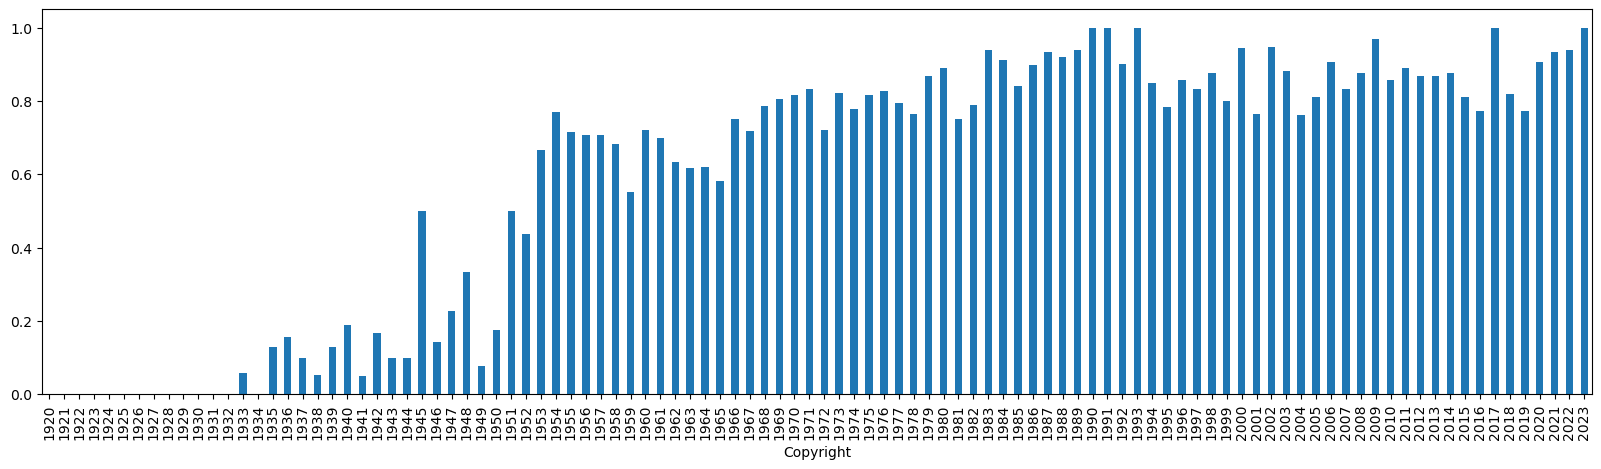

In [843]:
celoplosnahistorie.plot.bar(figsize=(20,5))

In [878]:
celoplosnahistorie[celoplosnahistorie < 0.5].tail(3)

Copyright
1949    0.076923
1950    0.176471
1952    0.437500
Name: celoplošná prolvenost, dtype: float64

In [877]:
celoplosnahistorie[celoplosnahistorie >= 0.5].head(3)

Copyright
1945    0.500000
1951    0.500000
1953    0.666667
Name: celoplošná prolvenost, dtype: float64

In [845]:
lide[(~lide['Film'].isin(zadnilvi) & lide['Lidé'].isin(lvovstvo))].head(10)

,Copyright,Film,Lidé
467,1930,Moderní výroba obuvi (401979),Otakar Vávra (9507)
482,1930,Světlo proniká tmou (401977),Otakar Vávra (9507)
484,1930,Zájezd Baťovců do Jugoslavie (401978),Otakar Vávra (9507)
584,1933,Žijeme v Praze (401976),Otakar Vávra (9507)
625,1933,Ze světa lesních samot (395592),Otakar Vávra (9507)
636,1933,Svítání (395596),Otakar Vávra (9507)
695,1935,Vdavky Nanynky Kulichovy (395689),Otakar Vávra (9507)
698,1935,Bezdětná (395699),Otakar Vávra (9507)
701,1935,Jedenácté přikázání (395694),Otakar Vávra (9507)
709,1935,Listopad (395682),Otakar Vávra (9507)


In [846]:
lide[(~lide['Film'].isin(zadnilvi) & lide['Lidé'].isin(lvovstvo))].groupby('Lidé')['Copyright'].min().nsmallest(20)

Lidé
Otakar Vávra (9507)           1930
Jiřina Bohdalová (2878)       1937
Vlastimil Brodský (833)       1937
Karel Černý (1241)            1939
Jiří Krejčík (7882)           1946
František Vláčil (5191)       1947
Ladislav Chudík (14421)       1948
Karel Kachyňa (3526)          1949
Vojtěch Jasný (4666)          1949
Jiří Kodet (7135)             1950
Stanislav Milota (11046)      1950
Věra Chytilová (1555)         1951
Miloš Forman (7872)           1952
Hynek Bočan (2947)            1953
Jana Brejchová (7710)         1953
Ladislav Mrkvička (6298)      1953
Stella Zázvorková (834)       1954
Věra Plívová-Šimková (186)    1954
Miroslav Ondříček (3524)      1956
Pavel Borovan (1347)          1956
Name: Copyright, dtype: int64

### Historická prolvenost II

In [847]:
lide

,Copyright,Film,Lidé
0,1898,Staroměstští hasiči (401702),Jan Kříženecký (127419)
1,1898,Smích a pláč (395110),Josef Šváb-Malostranský (55291)
1,1898,Smích a pláč (395110),Jan Kříženecký (127419)
2,1898,Cyklisté (401705),Jan Kříženecký (127419)
3,1898,Defilování vojska o Božím těle na Královských ...,Jan Kříženecký (127419)
...,...,...,...
4572,2023,Ostrov (402284),Karel Zámečník (75946)
4572,2023,Ostrov (402284),Roman Čapek (zvuk
4572,2023,Ostrov (402284),záznam a mix zvuku)
4572,2023,Ostrov (402284),Karel Zámečník


In [848]:
historicky = lide.merge(lvi[['Jméno','Ročník','Lev']], left_on='Lidé', right_on='Jméno')

In [849]:
historicky = historicky[(historicky['Lev'] == 'vyhra') & (historicky['Ročník'] < historicky['Copyright'])].drop_duplicates()

In [850]:
melilva = historicky['Film'].drop_duplicates().to_list()

In [851]:
novodobaprolvenost = pd.Series(filmy[filmy['Film'].isin(melilva)].groupby('Copyright')['Film'].nunique() / filmy.groupby('Copyright')['Film'].nunique(), name="novodobá prolvenost")

<Axes: xlabel='Copyright'>

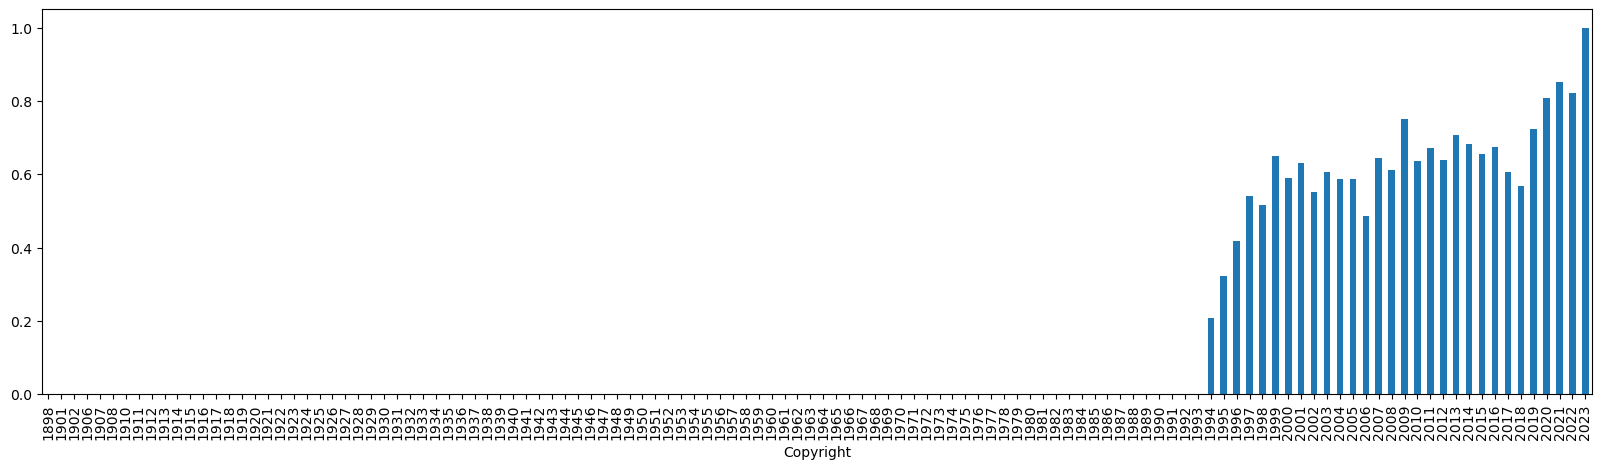

In [852]:
novodobaprolvenost.plot.bar(figsize=(20,5))

In [853]:
novodobaprolvenost[novodobaprolvenost < 0.5]

Copyright
1994    0.206897
1995    0.321429
1996    0.416667
2006    0.487179
Name: novodobá prolvenost, dtype: float64

In [854]:
historicky[historicky['Film'] == 'Mazaný Filip (20319)']['Lidé'].drop_duplicates()

16910    Milan Šteindler (1572)
19616       Eva Holubová (5948)
23071        Ivan Trojan (6789)
24971    Anna Geislerová (5433)
33737      Jiří Macháček (3133)
37088       Luděk Hudec (12627)
Name: Lidé, dtype: object

## Demografie

In [855]:
lvi.groupby('KategorieS').size().sort_values(ascending=False)

KategorieS
Nejlepší film                                              219
Nejlepší zvuk                                              182
Nejlepší dokument                                          170
Nejlepší scénář                                            165
Nejlepší hudba                                             161
Nejlepší střih                                             127
Nejlepší kamera                                            126
Nejlepší režie                                             124
Hlavní ženský herecký výkon                                121
Nejlepší herečka ve vedlejší roli                          121
Nejlepší herec v hlavní roli                               121
Nejlepší herec ve vedlejší roli                            119
Nejlepší výtvarný počin                                    118
Nejlepší masky                                              71
Nejlepší scénografie                                        69
Nejlepší kostýmy                            

In [856]:
lvi.groupby('KategorieS')['Věk'].mean().sort_values()

KategorieS
Nejlepší krátký film                                      14345 days 15:25:42.857142784
Nejlepší zvuk                                                       15688 days 03:00:00
Hlavní ženský herecký výkon                               15753 days 22:40:52.747252736
Cena filmových kritiků a teoretiků za nejlepší dokument   16126 days 11:17:38.823529472
Nejlepší režie                                            16226 days 07:28:31.475409920
Nejlepší film                                             16412 days 20:01:22.285714176
Nejlepší animovaný film                                   16481 days 13:42:51.428571392
Nejlepší herečka ve vedlejší roli                         16944 days 07:20:48.979591936
Nejlepší hudba                                            16959 days 13:47:35.172413696
Nejlepší scénář                                                     16959 days 16:10:00
Nejlepší dokument                                         17007 days 20:18:27.692307712
Nejlepší kamera      

In [857]:
lvi[lvi['Lev'] == 'vyhra'].groupby('KategorieS')['Věk'].mean().sort_values()

KategorieS
Nejlepší krátký film                                                10667 days 08:00:00
Cena filmových kritiků a teoretiků za nejlepší dokument             13667 days 00:00:00
Nejlepší zvuk                                                       15445 days 06:00:00
Nejlepší režie                                                      15646 days 19:12:00
Nejlepší scénář                                           15864 days 23:21:04.864864768
Nejlepší herečka ve vedlejší roli                                   15972 days 13:20:00
Nejlepší film                                                       16078 days 13:48:00
Hlavní ženský herecký výkon                               16111 days 19:23:04.615384576
Nejlepší hudba                                            16414 days 01:15:47.368421120
Nejlepší televizní film nebo minisérie                              16562 days 00:00:00
Nejlepší kostýmy                                                    16893 days 08:00:00
Nejlepší dokument    

In [858]:
with open(os.path.join("data_fixes", "zeny.json"), encoding="utf-8") as zeny:
    zeny = json.loads(zeny.read())

In [859]:
extrazeny = ['Agnieszka Holland','Halina Pawlowská','Vladivojovna La Chia','Vladivojna La Chia','Irena a Vojtěch Havlovi','Sussan Deyhim','La Petite Sonja','Irena Hradecká','Barbora Kačena','Milena Jelinek','Zdenka Simandlova','Andrea Schumacher','Ľubica Orechovská','Klára Bukovská','Kateřina Černá','Alice Nemanská','Mira Fornay','Jasmina Torbati','Susann Schimk','Katarína Horská','Andrea McDonald','Anett Weber','Barbara Kichi','Alina Janerka','Daria Kashcheeva','Anna Lyubynetska','Anna Wowra','Michaela Mihályi','Heike Richter-Karst','Patricia Ortiz Martinez','Dana Budisavljević','Miljenka Čogelja','Andrea Shaffer','Krystyna Krauze','Barbara Ławska','Jana Janěková ml.','Natália Pavlove']

In [860]:
for z in [x for x in lvi[lvi['KategorieS'] == 'Hlavní ženský herecký výkon']['Jméno bez id'].drop_duplicates().to_list() if x not in zeny]:
    zeny.append(z)
for z in [x for x in lvi[lvi['KategorieS'] == 'Nejlepší herečka ve vedlejší roli']['Jméno bez id'].drop_duplicates().to_list() if x not in zeny]:
    zeny.append(z)


In [861]:
for e in extrazeny:
    zeny.append(e)
zeny = list(set(zeny))

In [862]:
lvice = lvi[(lvi["Jméno bez id"].str[-1:] == 'á') | (lvi["Jméno bez id"].isin(zeny))]

In [863]:
(lvice[lvice['Lev'] == 'vyhra'].groupby('KategorieS').size() / lvi[lvi['Lev'] == 'vyhra'].groupby('KategorieS').size()).sort_values()

KategorieS
Nejlepší scénář                                            0.048780
Nejlepší střih                                             0.060606
Nejlepší film                                              0.062500
Nejlepší scénografie                                       0.066667
Nejlepší režie                                             0.066667
Nejlepší hudba                                             0.069767
Nejlepší televizní seriál                                  0.111111
Nejlepší výtvarný počin                                    0.171429
Dlouhodobý přínos českému filmu                            0.218750
Nejlepší televizní film nebo minisérie                     0.272727
Nejlepší animovaný film                                    0.333333
Nejlepší masky                                             0.363636
Nejlepší dokument                                          0.407407
Nejlepší krátký film                                       0.500000
Mimořádný počin v oblasti audiovize  

In [864]:
def kontrola_genderu(kategorie):
    lvovice = lvice['Jméno bez id'].drop_duplicates().to_list()
    return lvi[(lvi['KategorieS'] == kategorie) & (~lvi['Jméno bez id'].isin(lvovice))]['Jméno'].drop_duplicates().to_list()

In [865]:
kontrola_genderu('Nejlepší kamera')

['Jan Malíř (5933)',
 'Martin Štrba (829)',
 'Lukáš Milota (23907)',
 'Jaroslav Brabec (1744)',
 'Jiří Macák (1725)',
 'Martin Čech (6316)',
 'Jaromír Šofr (4285)',
 'Diviš Marek (933)',
 'Marek Dvořák (41227)',
 'F. A. Brabec (5610)',
 'Vladimír Smutný (1772)',
 'Mark Bliss (31678)',
 'Ramúnas Greičius',
 'Štěpán Kučera (492)',
 'Asen Šopov (6330)',
 'Jan Baset Střítežský',
 'Tomáš Juríček (6499)',
 'Jan Šťastný (2439)',
 'Martin Duba (529)',
 'Emil Sirotek',
 'Patrik Hoznauer (1037)',
 'Ján Ďuriš (6752)',
 'Marek Jícha (4509)',
 'David Ployhar (5816)',
 'Miro Gábor (4807)',
 'Alexander Šurkala (16390)',
 'Petr Hojda (1820)',
 'Friede Clausz',
 'Miloslav Holman (6355)',
 'Richard Řeřicha (2088)',
 'Juraj Šajmovič st.',
 'Karel Fairaisl (3609)',
 'Diego Romero Suarez-Llanos',
 'Antonio Riestra (37227)',
 'Jaromír Kačer (4673)',
 'Igor Luther (1908)',
 'Karl Oskarsson (58548)',
 'Tomáš Sysel (1331)',
 'Federico Cesca',
 'Adam Sikora (23288)',
 'Martin Douba (4249)',
 'Sean Ellis (130080

In [866]:
lvi[(lvi['KategorieS'] == 'Nejlepší scénář') & (lvi['Lev'] == 'vyhra')]['Jméno'].drop_duplicates()

28        Petr Jarchovský (2075)
145           Václav Havel (676)
152          Václav Šašek (1766)
198          Jiří Křižan (13207)
211             Jiří Hubač (848)
229      Vladimír Morávek (6734)
233            Jan Budař (11090)
326      Halina Pawlowská (9006)
367         Zdeněk Svěrák (1892)
513           Saša Gedeon (4830)
545           Bohdan Sláma (926)
675         Jiří Havelka (28977)
872          Petr Zelenka (4806)
989         Štěpán Hulík (57210)
1007         Julius Ševčík (149)
1010    Alex Koenigsmark (76145)
1011        Petr Kolečko (26737)
1110         Marek Najbrt (6349)
1113       Robert Geisler (6354)
1114       Benjamin Tuček (1557)
1148         Martin Šulík (5432)
1153        Marek Leščák (21550)
1154         Ondrej Šulaj (7592)
1330           Petr Václav (486)
1531         Petr Pýcha (401774)
1552       Ondřej Štindl (11562)
1587          Alice Nellis (535)
1668       Robert Sedláček (493)
1675        Vojtěch Mašek (1707)
1683      Marek Šindelka (76100)
1732      

In [867]:
lvice[(lvice['KategorieS'] == 'Nejlepší scénář') & (lvice['Lev'] == 'vyhra')]['Jméno'].drop_duplicates()

326     Halina Pawlowská (9006)
1587         Alice Nellis (535)
Name: Jméno, dtype: object

In [868]:
(lvice.groupby('KategorieS').size() / lvi.groupby('KategorieS').size()).sort_values()

KategorieS
Nejlepší kamera                                            0.007937
Nejlepší zvuk                                              0.016484
Nejlepší hudba                                             0.055901
Nejlepší televizní seriál                                  0.081081
Nejlepší scénografie                                       0.086957
Nejlepší režie                                             0.088710
Nejlepší scénář                                            0.109091
Nejlepší střih                                             0.118110
Nejlepší film                                              0.146119
Nejlepší výtvarný počin                                    0.194915
Dlouhodobý přínos českému filmu                            0.218750
Nejlepší televizní film nebo minisérie                     0.275000
Cena filmových kritiků a teoretiků za nejlepší dokument    0.294118
Nejlepší krátký film                                       0.366667
Nejlepší dokument                    

<Axes: xlabel='Ročník'>

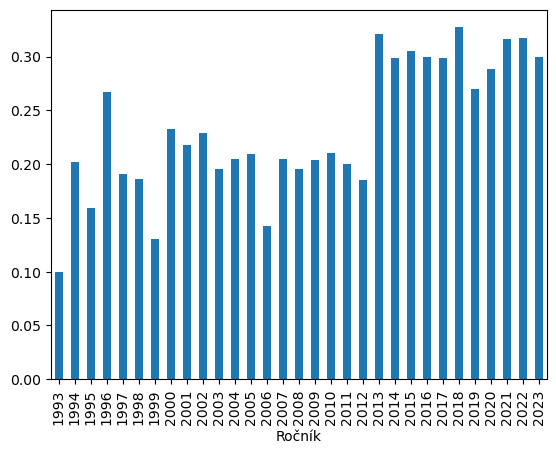

In [869]:
(lvice.groupby('Ročník').size() / lvi.groupby('Ročník').size()).plot.bar()

<Axes: xlabel='Ročník'>

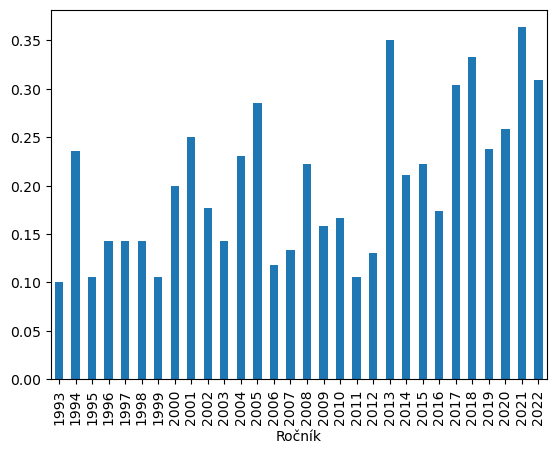

In [870]:
(lvice[lvice['Lev'] == 'vyhra'].groupby('Ročník').size() / lvi[lvi['Lev'] == 'vyhra'].groupby('Ročník').size()).plot.bar()

## Lvi vs. čsfd

In [871]:
csfd = pd.read_json(os.path.join("data","lvy_csfd.json"))

In [872]:
csfd.loc[csfd['Film'] == 'Záhrada', 'Film'] = 'Zahrada (8967)'

In [873]:
csfd.sort_values(by="Hodnocení", ascending=False)

,Film,Hodnocení,Počet hodnocení
3,Kolja (9013),86,62628
20,Hořící keř (398412),86,18718
7,Musíme si pomáhat (15231),85,35356
5,Je třeba zabít Sekala (163291),83,13392
15,Karamazovi (56434),82,13181
9,Rok ďábla (12836),80,14534
2,Zahrada (8967),80,4279
4,Knoflíkáři (9793),80,16878
19,Ve stínu (66076),79,21561
28,Zátopek,78,11964


In [874]:
csfd.sort_values(by="Počet hodnocení", ascending=True)

,Film,Hodnocení,Počet hodnocení
29,Il Boemo,63,3313
21,Cesta ven (400548),60,3671
25,Všechno bude (401774),59,3822
2,Zahrada (8967),80,4279
18,Poupata (116470),65,4971
8,Otesánek (401949),64,6061
26,Nabarvené ptáče (401962),68,8191
17,Pouta (80516),73,8719
1,Díky za každé nové ráno (7866),74,9328
14,Tajnosti (52699),69,9359
